# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [71]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [72]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [73]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


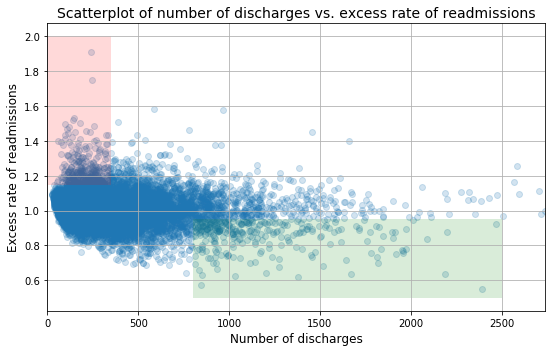

In [74]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [75]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [76]:
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['Discharges', 'Ratio']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Discharges    11497 non-null int32
Ratio         11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


In [78]:
df.describe()

,Discharges,Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


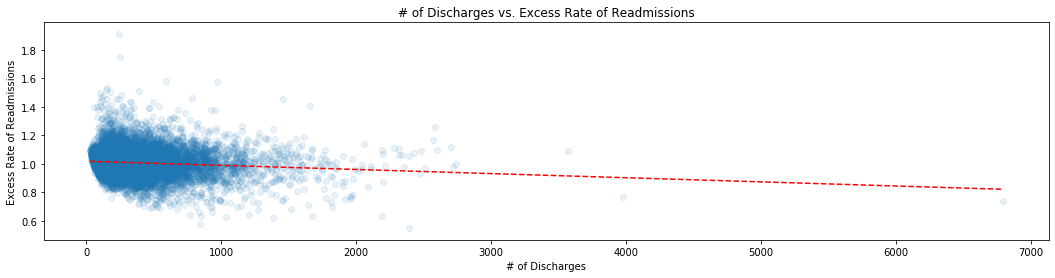

In [79]:
#Graph the # of Discharges vs the Excess Rate of Readmissions

x = df['Discharges']
y = df['Ratio']

plt.figure(figsize=(18, 4))
plt.scatter(x, y, alpha = .1)
plt.xlabel('# of Discharges')
plt.ylabel('Excess Rate of Readmissions')
plt.title('# of Discharges vs. Excess Rate of Readmissions')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show();

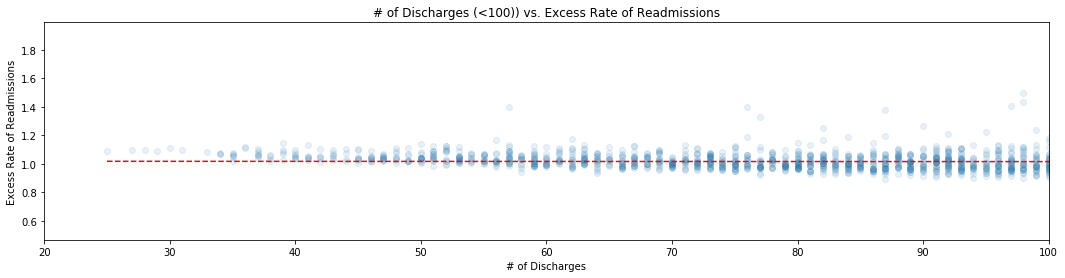

In [80]:
#Graph the # of Discharges vs the Excess Rate of Readmissions in Hospitals with Discharges < 100

x = df['Discharges']
y = df['Ratio']

plt.figure(figsize=(18, 4))
plt.scatter(x, y, alpha = .1)
plt.xlim(20,100)
plt.xlabel('# of Discharges')
plt.ylabel('Excess Rate of Readmissions')
plt.title('# of Discharges (<100)) vs. Excess Rate of Readmissions')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show();

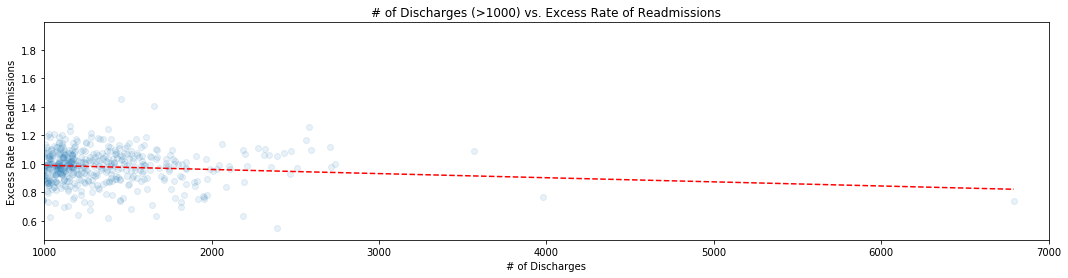

In [81]:
#Graph the # of Discharges vs the Excess Rate of Readmissions in Hospitals with Discharges > 1000

x = df['Discharges']
y = df['Ratio']

plt.figure(figsize=(18, 4))
plt.scatter(x, y, alpha = .1)
plt.xlim(1000,7000)
plt.xlabel('# of Discharges')
plt.ylabel('Excess Rate of Readmissions')
plt.title('# of Discharges (>1000) vs. Excess Rate of Readmissions')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show();

In [82]:
# Hospitals with < 100 discharges

ld_hospitals = df[df.Discharges<100]
ld_hospitals.describe()

,Discharges,Ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [83]:
# Hospitals with > 1000 discharges

hd_hospitals = df[df.Discharges>1000]
hd_hospitals.describe()

,Discharges,Ratio
count,463.000000,463.000000
mean,1383.427646,0.978335
std,459.109724,0.120007
min,1002.000000,0.549500
25%,1107.000000,0.907900
50%,1242.000000,0.986400
75%,1512.000000,1.057100
max,6793.000000,1.454300


$H_0$: There is no correlation between the number of discharges and the readmission rate.

$H_A$: A hospital's readmission rate is correlated with the number of discharges.

$$H_0: r = 0$$ $$H_A: r \neq 0$$

In [84]:
# calculate means for both groups
ld_mean = stats.trim_mean(ld_hospitals.Ratio, 0.05)
hd_mean = stats.trim_mean(hd_hospitals.Ratio, 0.05)

diff = ld_mean - hd_mean

print('Trimmed Means\nSmall Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n\nDifference: {:0.5}'.format(ld_mean, hd_mean, diff))

Trimmed Means
Small Hospitals: 1.0194
Large Hospitals: 0.98069

Difference: 0.038691


In [85]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

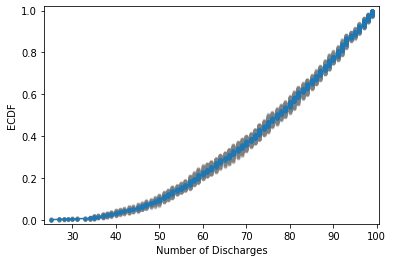

In [86]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(ld_hospitals.Discharges, size=len(ld_hospitals.Discharges))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(ld_hospitals.Discharges)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [88]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [89]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [90]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(ld_mean, hd_mean)

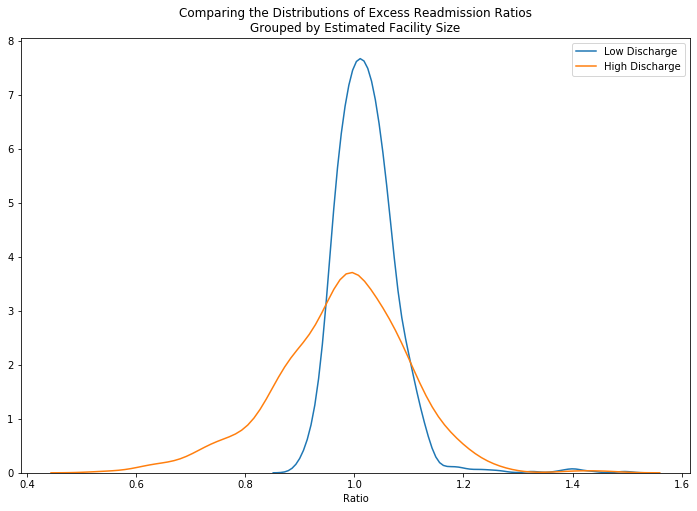

In [97]:
plt.figure(figsize=(12,8))
ax2 = sns.distplot(ld_hospitals['Ratio'], hist=False, label='Low Discharge')
sns.distplot(hd_hospitals['Ratio'],hist=False, label='High Discharge', ax=ax2)
plt.title('Comparing the Distributions of Excess Readmission Ratios\nGrouped by Estimated Facility Size')
ax2 = plt.legend()

In [99]:
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [106]:
# create empty array for bootstrapping
bs_replicates = np.empty(10000)
bs_small = np.empty(10000)
bs_large = np.empty(10000)
bs_med = np.empty(10000)

# bootstrap 100,000 replicate sample means
for i in range(10000):
    bs_replicates[i] = bootstrap_replicates(data=df['Ratio'])
    bs_small[i] = bootstrap_replicates(ld_hospitals['Ratio'])
    bs_large[i] = bootstrap_replicates(hd_hospitals['Ratio'])

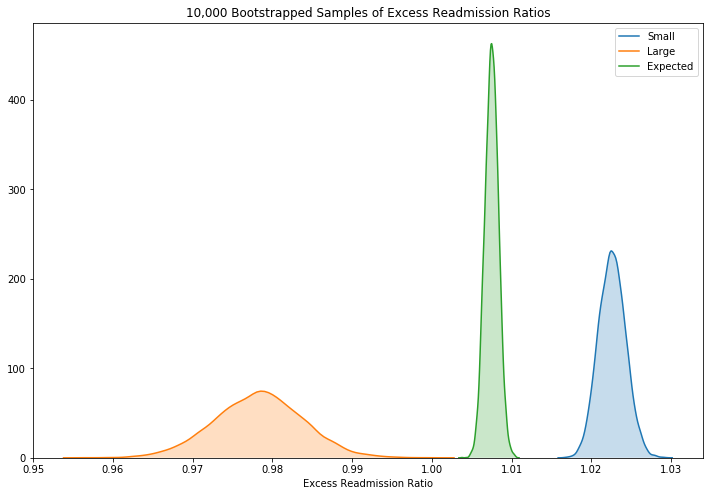

In [109]:
# draw a PDF of the sample means
plt.figure(figsize=(12,8))
ax3 = sns.distplot(bs_small, label='Small', hist=False, kde_kws={"shade": True})
sns.distplot(bs_large, label='Large', hist=False, kde_kws={"shade": True}, ax=ax3)
sns.distplot(bs_replicates, label='Expected', hist=False, kde_kws={"shade": True}, ax=ax3)
ax3 = plt.xlabel('Excess Readmission Ratio')
ax3 = plt.title('10,000 Bootstrapped Samples of Excess Readmission Ratios')
ax3 = plt.legend()

In [108]:
# calculate 95% confidence interval
np.percentile(bs_replicates, [2.5,97.5])

array([1.00583979, 1.00920125])

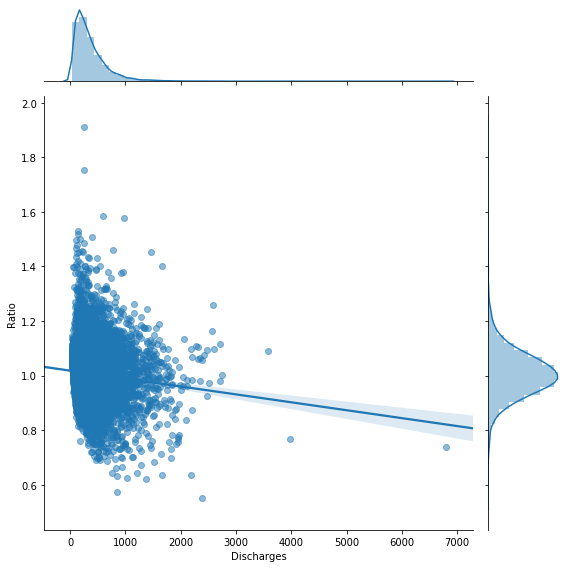

In [93]:
sns.jointplot('Discharges', 'Ratio', data=df, kind = 'reg', height = 8, scatter_kws = {'alpha' : 0.5})